# *synthtorch* tutorial

Train a network for a synthesis task with synthtorch

Author: Jacob Reinhold

Date: Mar 1, 2019

## Setup notebook

In [1]:
import logging
import sys

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from PIL import Image

import synthtorch

Setup a logger (change the level here to control output logging information)

In [2]:
logging.basicConfig(format='%(asctime)s - %(name)s - %(levelname)s - %(message)s', 
                    level=logging.getLevelName('INFO'))
logger = logging.getLogger(__name__)

 Support in-notebook plotting

In [3]:
%matplotlib inline

Report versions

In [4]:
print('numpy version: {}'.format(np.__version__))
from matplotlib import __version__ as mplver
print('matplotlib version: {}'.format(mplver))

numpy version: 1.15.4
matplotlib version: 3.0.2


In [5]:
pv = sys.version_info
print('python version: {}.{}.{}'.format(pv.major, pv.minor, pv.micro))

python version: 3.7.2


Reload packages where content for package development

In [6]:
%load_ext autoreload
%autoreload 2

## Setup learner

In this section, we instantiate a `learner` (inspired by the [fastai](https://github.com/fastai/fastai) library) which holds all the functions relevant to training and prediction; however, the library is tailored for experimentation with *synthesis* tasks, which is why we do not use fastai by itself.

The easiest way to interface with the library is to create a configuration file (see [here](https://gist.github.com/jcreinhold/793d26387f6a8b9f6966b59c6705f249) for an example with instructions on how to fill out the file at the bottom) which holds the experimental parameters and setup.

Below we import a configuration file for a T1-to-T1 (MPRAGE) task, i.e., a (denoising) autoencoder using a U-net architecture. In this case, I will actually load a pretrained model and continue training it (for one epoch). `synthtorch` knows to continue training if the configuration file field of `trained_model` is already an existing file, otherwise it will train a new network from scratch (and save it to the location in `trained_model`). 

In [7]:
config = synthtorch.ExperimentConfig.load_json('config.json')

Now we create the model in a wrapper called `Learner` with the specified configuration.

In [8]:
learner = synthtorch.Learner.train_setup(config)

2019-03-01 17:27:25,516 - synthnn.learn.learner - INFO - Number of trainable parameters in model: 531052
2019-03-01 17:27:25,544 - synthnn.learn.learner - INFO - Loaded checkpoint: tutorial.pth (epoch 30)
2019-03-01 17:27:25,546 - synthnn.learn.learner - INFO - Adding data augmentation transforms
2019-03-01 17:27:25,821 - synthnn.learn.learner - INFO - Number of training images: 57275
2019-03-01 17:27:25,856 - synthnn.learn.learner - INFO - Number of validation images: 7250
2019-03-01 17:27:25,857 - synthnn.learn.learner - INFO - LR: 0.00300


I can now train the model with the following command (I am only training for one epoch for this tutorial):

In [9]:
learner.fit(1)

2019-03-01 13:12:28,931 - synthnn.learn.learner - INFO - Epoch: 1 - Training Loss: 4.70e+00, Validation Loss: 4.65e+00


Now we can save the model to `tutorial.pth` with the following command:

In [9]:
learner.save('tutorial.pth')

You can run the commands below without the following command; however, I will load a model here which produces ok results.

In [10]:
learner.load('good.pth')

Now we can do a prediction with either a `.tif` file (since this example is a 2D network) or a `.nii` file (or `.png`, if that is what was used for training). Note that the filename(s) must be in a list because `synthtorch` supports multiple modalities for input/output. In this case I use a `.tif` file for the convenience of displaying the result.

In [11]:
test_fn = 'test_img.tif'
out_img = learner.predict([test_fn])

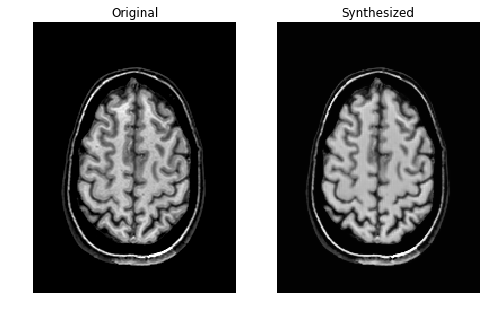

In [13]:
orig = np.asarray(Image.open(test_fn))
synth = np.asarray(out_img)
f, (ax1,ax2) = plt.subplots(1,2,figsize=(8,8))
ax1.imshow(orig,cmap='gray',vmax=synth.max()); ax1.axis('off'); ax1.set_title('Original')
ax2.imshow(synth,cmap='gray'); ax2.axis('off'); ax2.set_title('Synthesized');